In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from ONCToolbox import ONCToolbox
from ONCToolbox.utils.suna import SUNAv2ArchiveFileParser as SAFP

In [2]:
date_from = datetime(2025,7,3,22,0,0,0)
date_to = datetime(2025,7,4,23,59,59,999999)

In [3]:
onct = ONCToolbox()
safp = SAFP()

In [4]:
remote_files = onct.find_archive_file_urls(location_code = 'BACVP', device_category_code='NITRATESENSOR', date_from = date_from, date_to= date_to)

In [5]:
ds_list = []
for remote_file in remote_files:
    lines = safp.import_suna_from_url(remote_file)
    ds = safp.process_suna_lines(lines)
    ds_list.append(ds)
suna = xr.combine_by_coords(ds_list, combine_attrs='drop_conflicts')
suna = suna.where(suna.frame_type.str.contains('LF'), drop = True)  # Only keep light frames.

Text(0.5, 0, 'Intensity (counts)')

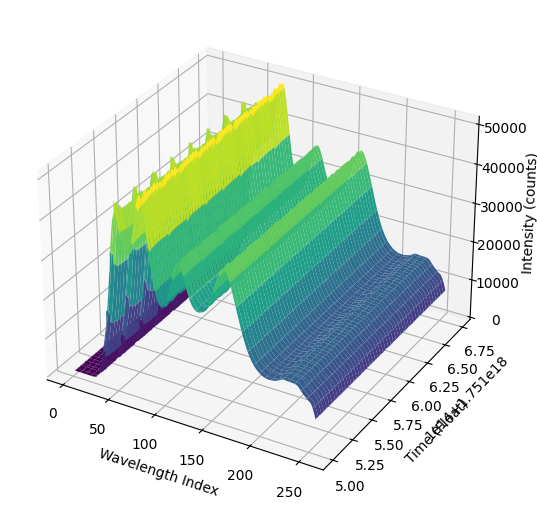

In [6]:
x, y = np.meshgrid(suna.wvl_idx, suna.time.astype(float))
z = suna.intensity

fig, ax = plt.subplots(1,1, figsize = (6,5), constrained_layout = True, subplot_kw={'projection':'3d'})

surf = ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('Wavelength Index')
ax.set_ylabel('Time (Float)')
ax.set_zlabel('Intensity (counts)')